# Preprocessing the Environment 

In this code we are using wrappers to wrap our environent. 

We will also be capturing frames, then passing those frames to AI so we can train our models. 

The frames capture where mario is, where is enemies are, ect... 

In [1]:
# Cedric Dortch Code: 
# Mario AI Project. 
# This file is inspired from Nicholas Renotte's Mario RL project
# GitHub: https://github.com/nicknochnack/MarioRL/blob/main/Mario%20Tutorial.ipynb

import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT #STANDARD PRACTICE
from nes_py.wrappers import JoypadSpace


#************************************************************************************************
# Wrapping the environment again for AI
from gym.wrappers import  GrayScaleObservation #the position of mario and enemies 

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

# Making the game and setting up the environment 
env = gym_super_mario_bros.make('SuperMarioBros-v3') #Something wrong with this version 
# env = gym_super_mario_bros.SuperMarioBrosEnv()
env = JoypadSpace(env, SIMPLE_MOVEMENT) #Wrapping environment to use SIMPLE_MOVEMENTS
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)


#****************************************************
# Wrapping our environment
# Greyscale
env = GrayScaleObservation(env, keep_dim=True)

# wrap in dummy 
env = DummyVecEnv([lambda: env])

# stack 4 different images together. 
env = VecFrameStack(env, 4, channels_order='last')
#****************************************************


/Users/cedricdortch/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [2]:

#***********************************************************************
# Code to fix bug
from nes_py import NESEnv
_reset = NESEnv.reset

def reset(*args, **kwargs):
    obs_info = _reset(*args, **kwargs)
    obs, info = obs_info if type(obs_info) == tuple else (obs_info, {})
    return obs, info
#***********************************************************************
NESEnv.reset = reset
state = env.reset()
print(state.shape)

(1, 240, 256, 4)


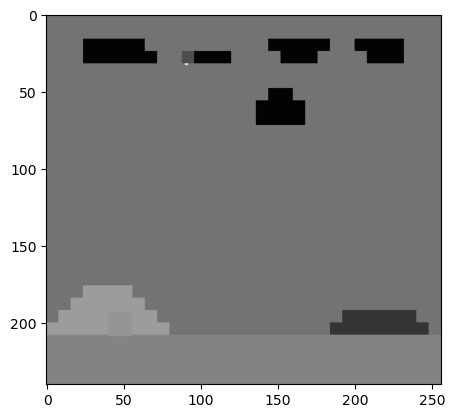

In [3]:
# In this code we are showing a frame! 
plt.imshow(state[0])